In [1]:
pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.0 MB 49.7 MB/s 
     |████████████████████████████████| 11.2 MB 44.0 MB/s 
     |████████████████████████████████| 1.0 MB 47.4 MB/s 
     |████████████████████████████████| 6.3 MB 43.8 MB/s 
     |████████████████████████████████| 16.7 MB 42.1 MB/s 
     |████████████████████████████████| 960 kB 24.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
import numpy as np
import osmnx as ox
from shapely import wkt
import matplotlib.pyplot as plt

def sample_points(G, n):
    gdf_edges = ox.graph_to_gdfs(G, nodes=False)[['geometry', 'length']]
    weights = gdf_edges['length'] / gdf_edges['length'].sum()
    idx = np.random.choice(gdf_edges.index, size=n, p=weights)
    lines = gdf_edges.loc[idx, 'geometry']
    return lines.interpolate(lines.length * np.random.rand())

# polygon = wkt.loads('POLYGON ((-122.418083 37.754154, -122.418082 37.766028, -122.410909 37.766028, -122.410908 37.754154, -122.418083 37.754154))')
# # use a projected graph for accurate sampling
# G = ox.project_graph(ox.graph_from_polygon(polygon, network_type='drive'))
# points = sample_points(G, 100)
# fig, ax = ox.plot_graph(G, show=False, close=False )
# points.plot(ax=ax)
# plt.show()
# # convert points back to lat/longs
# points_latlong = points.to_crs(4326)
# points_latlong

In [4]:
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.2'

In [18]:
# neighborhoods or boroughs
gdf = ox.geocode_to_gdf("Manhattan, New York, New York, USA")
polygon=gdf.geometry[0]
lst=[]
# for x,y in polygon.exterior.coords:
#    lst.append(f'{x},{y}')
list(polygon.geoms[2].exterior.coords)

[(-74.035443, 40.685125),
 (-74.019577, 40.679654),
 (-74.008663, 40.686249),
 (-74.008575, 40.686264),
 (-74.00829, 40.686314),
 (-74.008071, 40.686352),
 (-74.006809, 40.687123),
 (-74.005746, 40.687771),
 (-74.004848, 40.688289),
 (-74.004365, 40.688567),
 (-74.004043, 40.688789),
 (-74.003924, 40.688974),
 (-74.003505, 40.689626),
 (-74.002989, 40.690427),
 (-74.002548, 40.691113),
 (-74.002061, 40.691869),
 (-74.001863, 40.692177),
 (-74.001685, 40.692455),
 (-74.000333, 40.69498),
 (-73.999692, 40.696177),
 (-73.999519, 40.696465),
 (-73.999334, 40.696774),
 (-73.999061, 40.697229),
 (-73.998542, 40.698094),
 (-73.998159, 40.698732),
 (-73.997594, 40.699672),
 (-73.996818, 40.700965),
 (-73.99653, 40.701445),
 (-73.995347, 40.703049),
 (-73.99523, 40.703207),
 (-73.995053, 40.703424),
 (-73.994891, 40.703583),
 (-73.994255, 40.70403),
 (-73.993407, 40.704626),
 (-73.990749, 40.7049),
 (-73.990143, 40.70495),
 (-73.990073, 40.704956),
 (-73.9864, 40.705259),
 (-73.983437, 40.70550

In [42]:
# you can also buffer the place boundaries (0.5 km in this example)
gdf = ox.geocode_to_gdf("Piedmont, California, USA", buffer_dist=500)
polygon=gdf.geometry[0]

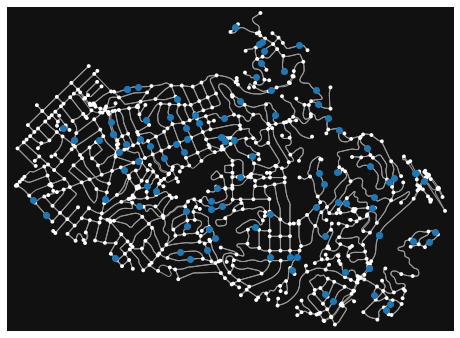

u          v          key
53064300   53118673   0      POINT (-122.21303 37.82017)
245387557  53116664   0      POINT (-122.21627 37.81957)
53022785   53056533   0      POINT (-122.24919 37.82674)
683050219  53023513   0      POINT (-122.23205 37.81988)
247141145  311884105  0      POINT (-122.24332 37.82613)
                                        ...             
53148506   53148507   0      POINT (-122.22269 37.81346)
246744892  53092201   0      POINT (-122.22287 37.81468)
317364095  53022623   0      POINT (-122.23135 37.82105)
53123865   53114730   0      POINT (-122.24188 37.82523)
53066395   53066394   0      POINT (-122.22595 37.83454)
Length: 100, dtype: geometry

In [43]:
#polygon = wkt.loads(str(gdf.geometry[0]))
# use a projected graph for accurate sampling
G = ox.project_graph(ox.graph_from_polygon(polygon, network_type='drive'))
points = sample_points(G, 100)
fig, ax = ox.plot_graph(G, show=False, close=False )
points.plot(ax=ax)
plt.show()
# convert points back to lat/longs
#points_latlong = points.to_crs(4326)
#points_latlong

In [53]:
polygon
lst=[]
for x,y in polygon.exterior.coords:
   lst.append(f'{x},{y}')

In [54]:
lst

['-122.25501018790567,37.823112807165145',
 '-122.2550266000337,37.82319868938136',
 '-122.25505505210712,37.82365141553032',
 '-122.25502602253563,37.82410411858333',
 '-122.25493980400081,37.82455221798362',
 '-122.25479726787417,37.824991179674186',
 '-122.25459985544072,37.825416561979395',
 '-122.25434956335287,37.82582406055472',
 '-122.25404892345989,37.82620955194975',
 '-122.25370097721598,37.82656913534315',
 '-122.25345491423286,37.82679854485678',
 '-122.25333045389817,37.82691521314805',
 '-122.25324375570715,37.827176210235066',
 '-122.25317776540109,37.827377137647964',
 '-122.2530103543633,37.82780029423802',
 '-122.25279131043551,37.8282083483532',
 '-122.25252275459563,37.82859734731342',
 '-122.25220728754537,37.82896352296069',
 '-122.2518479645401,37.82930332817016',
 '-122.25144826580903,37.829613471221506',
 '-122.25101206285213,37.829890947696974',
 '-122.25057340390353,37.83014288622411',
 '-122.24942884577376,37.83080345772382',
 '-122.249406960821,37.83083861

In [ ]:
# you can get multiple places in a single query
gdf = ox.geocode_to_gdf(["United Kingdom", "Ireland"])

# or optionally buffer them
places = [
    "Berkeley, California, USA",
    "Oakland, California, USA",
    "Piedmont, California, USA",
    "Emeryville, California, USA",
    "Alameda, Alameda County, CA, USA",
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)